### Model Evaluation

This is a demonstration of evaluating a model.

#### Step 1

Load the required dependencies.


In [2]:
# Import frameworks
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('../style_Matplotlib_charts.mplstyle')
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import pickle

####  Step 2

Load the model for testing

In [3]:
filename = 'LinearRegression_Models/A/A_model_v1.sav'
model_A = pickle.load(open(filename, 'rb'))


####  Step 3
Open and parse the test data CSV file and store the data as variable array data objects.

In [4]:
x_col = 'prop_cbd'
testing_data = pd.read_csv('A_testing_data_new.csv')
x_test = np.array(testing_data[x_col]).reshape(-1,1)
y_test = np.array(testing_data['Target'])

#### Step 4

Plot the test data features, targets and linear regression model to visually evaluate the model.

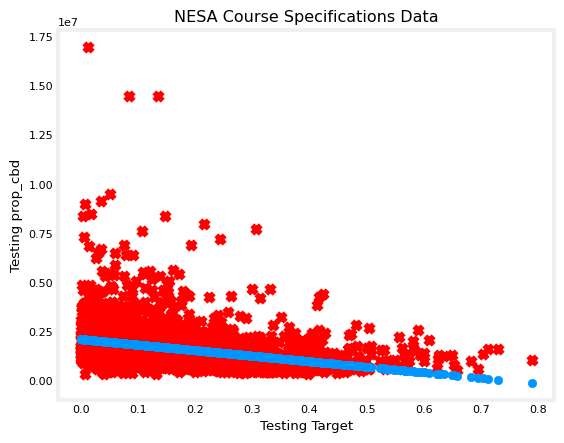

In [5]:
y_pred = model_A.predict(x_test)
plt.scatter(x_test, y_test, marker='x', c='r')
plt.scatter(x_test, y_pred)
plt.title("NESA Course Specifications Data")
plt.ylabel(f'Testing {x_col}')
plt.xlabel(f'Testing Target')
plt.show()

- As mentioned previously the linear regression model has high cost, representative of its lack of applicability here for predicting house prices

#### Step 6

Use the 'score' method of the `LinearRegression` class to return a score based evaluation of the models accuracy or performance.

In [6]:
test_score = model_A.score(x_test, y_test)
print(f'Training data score: {test_score}')

Training data score: 0.08363255175060591


#### Step 9. Multiple Variable Linear Regression

You should be able to understand the code snippets with less guidelines.

In [8]:
filename = 'LinearRegression_Models/A/A_MV_model_v6.sav'
model_C = pickle.load(open(filename, 'rb'))

In [13]:
mx_col = ['ds_float','num_parking', 'num_bed', 'num_bath', 'property_size', 'suburb_lat', 'suburb_lng', 'prop_cbd', 'tot_rooms', 'suburb_median_income']
testing_data = pd.read_csv('A_testing_data_new_1.csv')
mx_test = np.array(testing_data[mx_col])
my_test = np.array(testing_data['Target'])

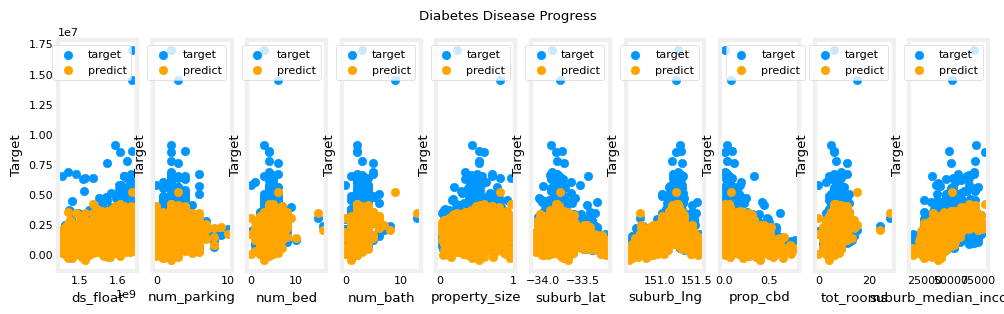

In [14]:
my_pred = model_C.predict(mx_test)

# plot predictions and targets vs original features    
fig,ax=plt.subplots(1,len(mx_col),figsize=(12,3),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(mx_test[:,i],my_test, label = 'target')
    ax[i].set_xlabel(mx_col[i])
    ax[i].scatter(mx_test[:,i],my_pred,color="orange", label = 'predict')
    ax[i].set_ylabel("Target"); ax[i].legend();
fig.suptitle("Diabetes Disease Progress")
plt.show()

In [15]:
test_score = model_C.score(mx_test, my_test)
print(f'Training data score: {test_score}')

Training data score: 0.5473149171115648
